In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [97]:
api_service_name = "youtube"
api_version = "v3"
API_KEY = "[YOUR_API_KEY]"

youtube = build(api_service_name, api_version, developerKey=API_KEY)
channel_ids =  ["UCkCGANrihzExmu9QiqZpPlQ",
               "UCW8Ews7tdKKkBT6GdtQaXvQ",
               "UCL8w_A8p8P1HWI3k6PR5Z6w",
               "UC2D2CMWXMOVWx7giW1n3LIg"]

# Get credentials and create an API

In [98]:
def get_channel_stats(youtube, channel_ids):
    
    all_data = []
    
    request = youtube.channels().list(
                part = "snippet, contentDetails, statistics",
                id = ','.join(channel_ids)
            )
    response = request.execute()
    
    for i in range(len(response['items'])):
        
        data = dict(channel_name = response['items'][i]['snippet']['title'],
                    subscriber = response['items'][i]['statistics']['subscriberCount'],
                    views = response['items'][i]['statistics']['viewCount'],
                    video_count = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                   )
        all_data.append(data)
    
    return all_data

# Get Channel Statistic

In [4]:
get_channel_stats(youtube, channel_ids)

[{'channel_name': 'Two Cents',
  'subscriber': '648000',
  'views': '42190543',
  'video_count': '128',
  'playlist_id': 'UUL8w_A8p8P1HWI3k6PR5Z6w'},
 {'channel_name': 'Andrew Huberman',
  'subscriber': '2560000',
  'views': '93728382',
  'video_count': '124',
  'playlist_id': 'UU2D2CMWXMOVWx7giW1n3LIg'},
 {'channel_name': 'How Money Works',
  'subscriber': '656000',
  'views': '76701483',
  'video_count': '142',
  'playlist_id': 'UUkCGANrihzExmu9QiqZpPlQ'},
 {'channel_name': 'StrataScratch',
  'subscriber': '40200',
  'views': '1288789',
  'video_count': '134',
  'playlist_id': 'UUW8Ews7tdKKkBT6GdtQaXvQ'}]

In [68]:
channel_data = pd.DataFrame(get_channel_stats(youtube, channel_ids))

In [69]:
channel_data

,channel_name,subscriber,views,video_count,playlist_id
0,How Money Works,656000,76701483,142,UUkCGANrihzExmu9QiqZpPlQ
1,StrataScratch,40200,1288789,134,UUW8Ews7tdKKkBT6GdtQaXvQ
2,Andrew Huberman,2560000,94095640,124,UU2D2CMWXMOVWx7giW1n3LIg
3,Two Cents,648000,42200130,128,UUL8w_A8p8P1HWI3k6PR5Z6w


In [70]:
playlist_id = channel_data.loc[channel_data["channel_name"]=="Andrew Huberman",'playlist_id'].iloc[0]

In [71]:
playlist_id

'UU2D2CMWXMOVWx7giW1n3LIg'

# Get Video Id

In [72]:
def get_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(
        part="contentDetails",
        playlistId = playlist_id,
        maxResults = 50 
        )
    response = request.execute()
    
    for i in range(len(response['items'])): 
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    #total video of Andrew Huberman channel is more than 40. How to get all? nextPageToken
    
    next_page_token = response.get('nextPageToken')
    
    while next_page_token is not None:
        request = youtube.playlistItems().list(
            part="contentDetails",
            playlistId = playlist_id,
            maxResults = 50, #acceptable value for maxResults is up to 50, see the documentation
            pageToken = next_page_token
            )
        response = request.execute()
        
        for i in range(len(response['items'])):
            video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
    
    return video_ids

In [73]:
get_video_ids(youtube, playlist_id)

['UIy-WQCZd4M',
 'CGjdgy0cwGk',
 'oNkDA2F7CjM',
 'GVRDGQhoEYQ',
 'CyDLbrZK75U',
 'O1YRwWmue4Y',
 'zEYE-vcVKy8',
 'ycOBZZeVeAc',
 'uak_dXHh6s4',
 'tLS6t3FVOTI',
 '-wIt_WsJGfw',
 '__RAXBLt1iM',
 'KPlJcD-o-4Q',
 'uwWOc_RqTBA',
 'O640yAgq5f8',
 'vZ4kOr38JhY',
 'iw97uvIge7c',
 '6I5I56uVvLw',
 'xjEFo3a1AnI',
 'LTGGyQS1fZE',
 'TO0WUTq5zYI',
 'K4Ze-Sp6aUE',
 'lsODSDmY4CY',
 'wTBSGgbIvsY',
 'Z7MU6zrAXsM',
 'q1Ss8sTbFBY',
 'X4QE6t-MkYE',
 'gXvuJu1kt48',
 'Nr5xb-QCBGA',
 'uXs-zPc63kM',
 'uxZFl4BDOGk',
 'yb5zpo5WDG4',
 '3_auLYOilb8',
 'LVxL_p_kToc',
 'DkS1pkKpILY',
 '2Ds1m5gflCI',
 'DTCmprPCDqc',
 'h2aWYjSA1Jc',
 '7YGZZcXqKxE',
 'm_OazsImOiI',
 'UChhXiFPRgg',
 'T65RDBiB5Hs',
 'UNCwdFxPtE8',
 'OadokY8fcAA',
 'a9yFKPmPZ90',
 'tkH2-_jMCSk',
 'IOl28gj_RXw',
 'dzOvi0Aa2EA',
 '099hgtRoUZw',
 'szqPAPKE5tQ',
 'RBK5KLA5Jjg',
 'XcvhERcZpWw',
 'EQ3GjpGq5Y8',
 'UF0nqolsNZc',
 'ncSoor2Iw8k',
 'pq6WHJzOkno',
 'IAnhFUUCq6c',
 'VAEzZeaV5zM',
 'azb3Ih68awQ',
 'ouCWNRvPk20',
 '15R2pMqU2ok',
 'PctD-ki8dCc',
 'gMRph_

In [85]:
video_ids = get_video_ids(youtube, playlist_id)

In [86]:
len(video_ids)

124

In [87]:
def get_video_details(youtube, video_ids):
    
    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        
        request = youtube.videos().list(
                part="snippet, contentDetails, statistics",
                id = ','.join(video_ids[i:i+50]) 
                )
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(video_id = video['id'],
                               title = video['snippet']['title'],
                               published_date = video['snippet']['publishedAt'],
                               views = video['statistics']['viewCount'],
                               likes = video['statistics']['likeCount'],
                               favorites = video['statistics']['favoriteCount'],
                               comments = video['statistics']['commentCount']                              
                              )
            all_video_info.append(video_stats)    
        
    return all_video_info

In [88]:
get_video_details(youtube, video_ids)

[{'video_id': 'UIy-WQCZd4M',
  'title': 'Dr. Andy Galpin: Optimize Your Training Program for Fitness & Longevity | Huberman Lab Guest Series',
  'published_date': '2023-02-08T13:00:30Z',
  'views': '151196',
  'likes': '3639',
  'favorites': '0',
  'comments': '368'},
 {'video_id': 'CGjdgy0cwGk',
  'title': 'How to Stop Headaches Using Science-Based Approaches | Huberman Lab Podcast',
  'published_date': '2023-02-06T13:00:15Z',
  'views': '160475',
  'likes': '4871',
  'favorites': '0',
  'comments': '768'},
 {'video_id': 'oNkDA2F7CjM',
  'title': 'Dr. Andy Galpin: How to Build Physical Endurance & Lose Fat | Huberman Lab Guest Series',
  'published_date': '2023-02-01T13:00:27Z',
  'views': '492413',
  'likes': '9340',
  'favorites': '0',
  'comments': '835'},
 {'video_id': 'GVRDGQhoEYQ',
  'title': 'Dr. Sara Gottfried: How to Optimize Female Hormone Health for Vitality & Longevity | Huberman Lab',
  'published_date': '2023-01-30T13:00:10Z',
  'views': '485278',
  'likes': '15026',
  '

In [89]:
video_details = get_video_details(youtube, video_ids)

In [90]:
video_data = pd.DataFrame(video_details)

In [91]:
video_data

,video_id,title,published_date,views,likes,favorites,comments
0,UIy-WQCZd4M,Dr. Andy Galpin: Optimize Your Training Progra...,2023-02-08T13:00:30Z,151196,3639,0,368
1,CGjdgy0cwGk,How to Stop Headaches Using Science-Based Appr...,2023-02-06T13:00:15Z,160475,4871,0,768
2,oNkDA2F7CjM,Dr. Andy Galpin: How to Build Physical Enduran...,2023-02-01T13:00:27Z,492413,9340,0,835
3,GVRDGQhoEYQ,Dr. Sara Gottfried: How to Optimize Female Hor...,2023-01-30T13:00:10Z,485278,15026,0,2315
4,CyDLbrZK75U,Dr. Andy Galpin: Optimal Protocols to Build St...,2023-01-25T12:00:12Z,390215,9974,0,956
...,...,...,...,...,...,...,...
119,NAATB55oxeQ,Find Your Temperature Minimum to Defeat Jetlag...,2021-01-25T13:00:18Z,324018,9908,0,1307
120,nwSkFq4tyC0,"Using Science to Optimize Sleep, Learning & Me...",2021-01-18T13:00:25Z,1008630,30577,0,1920
121,nm1TxQj9IsQ,Master Your Sleep & Be More Alert When Awake |...,2021-01-11T13:59:33Z,2224791,69853,0,4374
122,H-XfCl-HpRM,How Your Nervous System Works & Changes | Hube...,2021-01-04T16:00:44Z,973524,44127,0,2827


In [92]:
#changedatatype
video_data['published_date'] = pd.to_datetime(video_data['published_date']).dt.date
video_data['views'] = pd.to_numeric(video_data['views'])
video_data['likes'] = pd.to_numeric(video_data['likes'])
video_data['favorites'] = pd.to_numeric(video_data['favorites'])
video_data['comments'] = pd.to_numeric(video_data['comments'])

In [93]:
video_data

,video_id,title,published_date,views,likes,favorites,comments
0,UIy-WQCZd4M,Dr. Andy Galpin: Optimize Your Training Progra...,2023-02-08,151196,3639,0,368
1,CGjdgy0cwGk,How to Stop Headaches Using Science-Based Appr...,2023-02-06,160475,4871,0,768
2,oNkDA2F7CjM,Dr. Andy Galpin: How to Build Physical Enduran...,2023-02-01,492413,9340,0,835
3,GVRDGQhoEYQ,Dr. Sara Gottfried: How to Optimize Female Hor...,2023-01-30,485278,15026,0,2315
4,CyDLbrZK75U,Dr. Andy Galpin: Optimal Protocols to Build St...,2023-01-25,390215,9974,0,956
...,...,...,...,...,...,...,...
119,NAATB55oxeQ,Find Your Temperature Minimum to Defeat Jetlag...,2021-01-25,324018,9908,0,1307
120,nwSkFq4tyC0,"Using Science to Optimize Sleep, Learning & Me...",2021-01-18,1008630,30577,0,1920
121,nm1TxQj9IsQ,Master Your Sleep & Be More Alert When Awake |...,2021-01-11,2224791,69853,0,4374
122,H-XfCl-HpRM,How Your Nervous System Works & Changes | Hube...,2021-01-04,973524,44127,0,2827


In [94]:
best_videos = video_data.sort_values(by='views', ascending=False).head(10)

In [95]:
best_videos

,video_id,title,published_date,views,likes,favorites,comments
82,QmOF0crdyRU,"Controlling Your Dopamine For Motivation, Focu...",2021-09-27,4777270,160075,0,7112
84,hFL6qRIJZ_Y,ADHD & How Anyone Can Improve Their Focus | Hu...,2021-09-13,3529982,82169,0,7182
99,XLr2RKoD-oY,"Science of Muscle Growth, Increasing Strength ...",2021-05-31,3138854,77206,0,3277
34,DkS1pkKpILY,"What Alcohol Does to Your Body, Brain & Health...",2022-08-22,2969894,68865,0,7012
68,Wcs2PFz5q6g,The Science of Making & Breaking Habits | Hube...,2022-01-03,2791336,52894,0,1603
80,9tRohh0gErM,Effects of Fasting & Time Restricted Eating on...,2021-10-11,2755750,65010,0,3890
100,GqPGXG5TlZw,How to Lose Fat with Science-Based Tools | Hub...,2021-05-24,2398030,59588,0,3515
18,xjEFo3a1AnI,Dr. Chris Palmer: Diet & Nutrition for Mental ...,2022-11-21,2373441,30323,0,2724
21,K4Ze-Sp6aUE,Dr Layne Norton: The Science of Eating for Hea...,2022-11-07,2314461,31795,0,1980
121,nm1TxQj9IsQ,Master Your Sleep & Be More Alert When Awake |...,2021-01-11,2224791,69853,0,4374


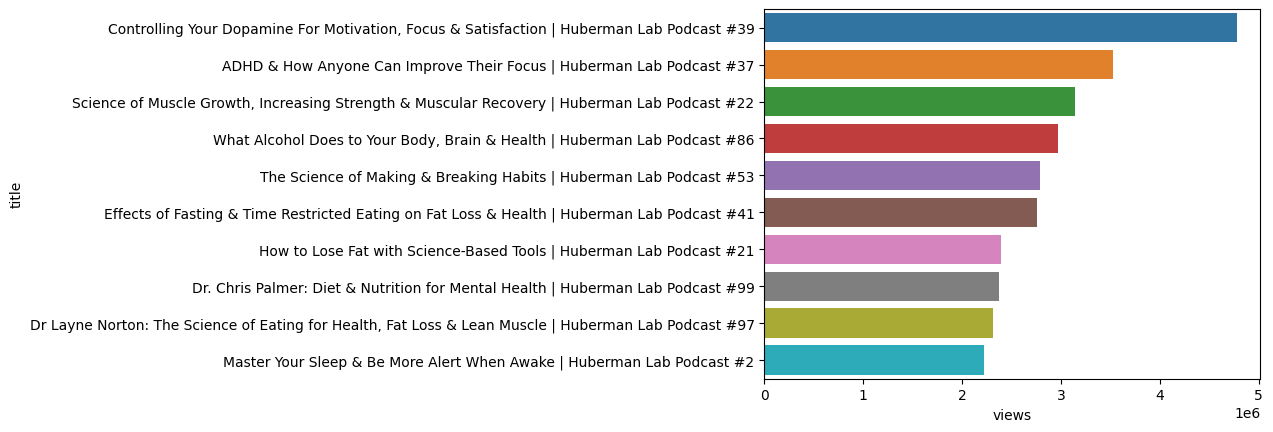

In [96]:
ax = sns.barplot(data= best_videos, x='views', y ='title')